In [196]:
import pandas as pd
import numpy as np

In [197]:
import matplotlib.pyplot as plt
import seaborn as sbs

In [198]:
from sklearn.linear_model import LogisticRegression

In [199]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [200]:
%matplotlib inline

In [201]:
# Load data

In [202]:
train_data = pd.read_csv('test.csv')
test_data = pd.read_csv('train.csv')

In [203]:
# Clean train data set

In [204]:
train_data.head(5)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [205]:
# Start to explore data

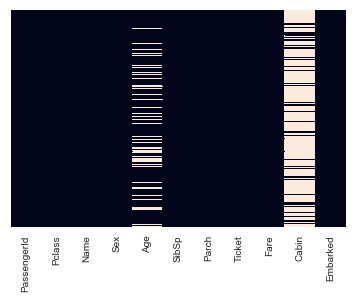

In [206]:
sbs.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

In [207]:
# We can clean Age a little bit. 
# But Cabin should be removed or transformed

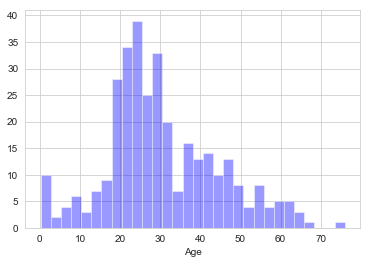

In [208]:
sbs.set_style('whitegrid')
sbs.distplot(train_data['Age'].dropna(), kde=False, color='blue', bins=30)

In [209]:
# Looks qute normal, like normal distribution...

In [210]:
train_data.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S

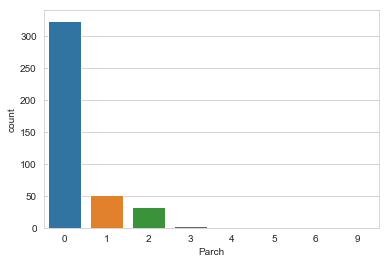

In [211]:
sbs.countplot('Parch',data=train_data)

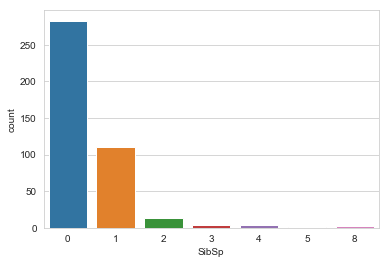

In [212]:
sbs.countplot('SibSp',data=train_data)

In [213]:
# Lets check about Fare

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


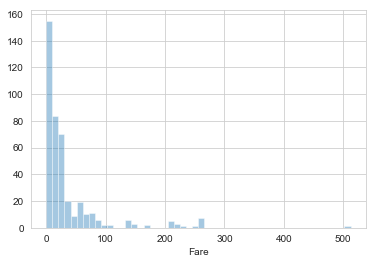

In [214]:
sbs.distplot(train_data['Fare'].dropna(),kde=False)

In [215]:
# Time to clean data

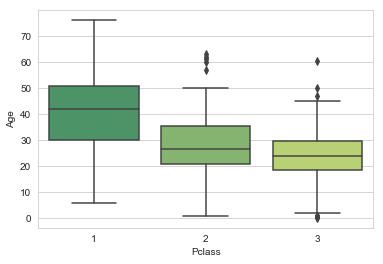

In [216]:
sbs.boxplot(x='Pclass', y='Age', data=train_data, palette='summer')

In [217]:
# Older = wealthier

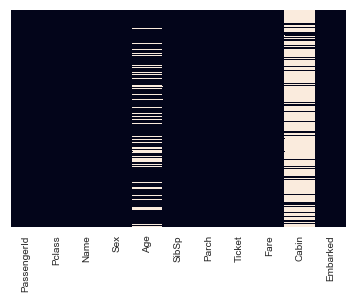

In [218]:
sbs.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

In [219]:
# Still need to clean Age and Cabin
# Starting from Age
# Will replace all NaN-s with mean value in ticket class

In [220]:
def get_mean_from_class(cl):
    if cl >= 1 and cl <= 3:
        return train_data[train_data['Pclass'] == cl]['Age'].mean()
    else:
        return 0

def mean_age_by_classes(columns):
    mean_3 = get_mean_from_class(3)
    mean_2 = get_mean_from_class(2)
    mean_1 = get_mean_from_class(1)
    
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return mean_1
        elif Pclass == 2:
            return mean_2
        else:
            return mean_3
    else:
        return Age

In [221]:
train_data['Age'] = train_data[['Age','Pclass']].apply(mean_age_by_classes,axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(mean_age_by_classes,axis=1)

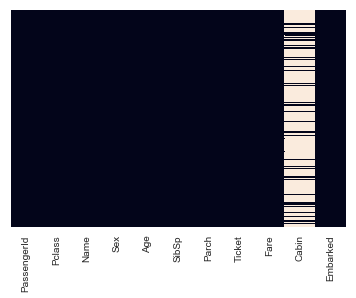

In [222]:
sbs.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

In [223]:
# Age is clear
# It is time for cabin

In [224]:
train_data['Cabin'].fillna('U', inplace=True)
train_data['Cabin'] = train_data['Cabin'].astype(str).str[0]
test_data['Cabin'].fillna('U', inplace=True)
test_data['Cabin'] = test_data['Cabin'].astype(str).str[0]

In [225]:
train_data.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292     U        Q  
1      0  363272  7.0000     U        S  
2      0  240276  9.6875     U        Q

In [226]:
# Better
# Time to convert categorical features into dummies and remove PassengerId

In [227]:
sex_d = pd.get_dummies(train_data['Sex'], drop_first=True)
embark_d = pd.get_dummies(train_data['Embarked'], drop_first=True)
cabin_d = pd.get_dummies(train_data['Cabin'], drop_first=True)
pclass_d = pd.get_dummies(train_data['Pclass'], drop_first=True)

In [228]:
train_data.drop(columns=['PassengerId'],inplace = True)
train_data = pd.concat([train_data, sex_d, embark_d, cabin_d, pclass_d], axis=1)

In [229]:
sex_d = pd.get_dummies(test_data['Sex'], drop_first=True)
embark_d = pd.get_dummies(test_data['Embarked'], drop_first=True)
cabin_d = pd.get_dummies(test_data['Cabin'], drop_first=True)
pclass_d = pd.get_dummies(test_data['Pclass'], drop_first=True)

In [230]:
test_data.drop(columns=['PassengerId'],inplace = True)
test_data = pd.concat([test_data, sex_d, embark_d, cabin_d, pclass_d], axis=1)

In [231]:
train_data.head(5)

Pclass                                          Name     Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    male  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2       2                     Myles, Mr. Thomas Francis    male  62.0      0   
3       3                              Wirz, Mr. Albert    male  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

   Parch   Ticket     Fare Cabin Embarked ...  S  B  C  D  E  F  G  U  2  3  
0      0   330911   7.8292     U        Q ...  0  0  0  0  0  0  0  1  0  1  
1      0   363272   7.0000     U        S ...  1  0  0  0  0  0  0  1  0  1  
2      0   240276   9.6875     U        Q ...  0  0  0  0  0  0  0  1  1  0  
3      0   315154   8.6625     U        S ...  1  0  0  0  0  0  0  1  0  1  
4      1  3101298  12.2875     U        S ...  1  0  0  0  0  0  0  1  0  1  

[5 rows x 22 columns]

In [232]:
test_data.head(5)

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin ...  B  C  D  \
0    male  22.0      1      0         A/5 21171   7.2500     U ...  0  0  0   
1  female  38.0      1      0          PC 17599  71.2833     C ...  0  1  0   
2  female  26.0      0      0  STON/O2. 3101282   7.9250     U ...  0  0  0   
3  female  35.0      1      0            113803  53.1000     C ...  0  1  0   
4    male  35.0      0      0            373450   8.0500     U ...  0  0  0   

   E  F  G  T  U  2  3  
0  0  0  0  0  1  0  1  
1  0  0  0  0  0  0  0  
2  0  0  0  0  1  0  1  
3  0  0  0  0  0  0  0  
4  0  0  0  0  1  0  1  

[5 rows x 24 columns]

In [ ]:
# Added survived - no sense, just try

In [233]:
train_data['Survived'] = np.nan

In [234]:
train_data.head(2)

Pclass                              Name     Sex   Age  SibSp  Parch  \
0       3                  Kelly, Mr. James    male  34.5      0      0   
1       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   

   Ticket    Fare Cabin Embarked    ...     B  C  D  E  F  G  U  2  3  \
0  330911  7.8292     U        Q    ...     0  0  0  0  0  0  1  0  1   
1  363272  7.0000     U        S    ...     0  0  0  0  0  0  1  0  1   

   Survived  
0       NaN  
1       NaN  

[2 rows x 23 columns]

In [ ]:
# Check unique values of C - c column generate exceptions (I assume)

In [235]:
train_data['C'].unique()

array([0, 1], dtype=uint64)

In [236]:
test_data['C'].unique()

array([0, 1], dtype=uint64)

In [237]:
train_data.drop('Survived',axis=1)

Pclass                                               Name     Sex  \
0         3                                   Kelly, Mr. James    male   
1         3                   Wilkes, Mrs. James (Ellen Needs)  female   
2         2                          Myles, Mr. Thomas Francis    male   
3         3                                   Wirz, Mr. Albert    male   
4         3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5         3                         Svensson, Mr. Johan Cervin    male   
6         3                               Connolly, Miss. Kate  female   
7         2                       Caldwell, Mr. Albert Francis    male   
8         3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9         3                            Davies, Mr. John Samuel    male   
10        3                                   Ilieff, Mr. Ylio    male   
11        1                         Jones, Mr. Charles Cresson    male   
12        1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female   
13        2                               Howard, Mr. Benjamin    male   
14        1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...  female   
15        2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)  female   
16        2                                  Keane, Mr. Daniel    male   
17        3                                  Assaf, Mr. Gerios    male   
18        3                       Ilmakangas, Miss. Ida Livija  female   
19        3              Assaf Khalil, Mrs. Mariana (Miriam")"  female   
20        1                             Rothschild, Mr. Martin    male   
21        3                          Olsen, Master. Artur Karl    male   
22        1               Flegenheim, Mrs. Alfred (Antoinette)  female   
23        1                    Williams, Mr. Richard Norris II    male   
24        1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  female   
25        3                            Robins, Mr. Alexander A    male   
26        1                       Ostby, Miss. Helene Ragnhild  female   
27        3                                  Daher, Mr. Shedid    male   
28        1                            Brady, Mr. John Bertram    male   
29        3                                  Samaan, Mr. Elias    male   
..      ...                                                ...     ...   
388       3                               Canavan, Mr. Patrick    male   
389       3                        Palsson, Master. Paul Folke    male   
390       1                         Payne, Mr. Vivian Ponsonby    male   
391       1     Lines, Mrs. Ernest H (Elizabeth Lindsey James)  female   
392       3                      Abbott, Master. Eugene Joseph    male   
393       2                               Gilbert, Mr. William    male   
394       3                           Kink-Heilmann, Mr. Anton    male   
395       1     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)  female   
396       3                               Colbert, Mr. Patrick    male   
397       1  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...  female   
398       3                     Larsson-Rondberg, Mr. Edvard A    male   
399       3                           Conlon, Mr. Thomas Henry    male   
400       1                            Bonnell, Miss. Caroline  female   
401       2                                    Gale, Mr. Harry    male   
402       1                     Gibson, Miss. Dorothy Winifred  female   
403       1                             Carrau, Mr. Jose Pedro    male   
404       1                       Frauenthal, Mr. Isaac Gerald    male   
405       2       Nourney, Mr. Alfred (Baron von Drachstedt")"    male   
406       2                          Ware, Mr. William Jeffery    male   
407       1                         Widener, Mr. George Dunton    male   
408       3                    Riordan, Miss. Johanna Hannah""  female   
409       3                          Peacock, Miss. Treasteall  female   
410      

In [ ]:
# Check columns again

In [238]:
train_data.columns

Index([  'Pclass',     'Name',      'Sex',      'Age',    'SibSp',    'Parch',
         'Ticket',     'Fare',    'Cabin', 'Embarked',     'male',        'Q',
              'S',        'B',        'C',        'D',        'E',        'F',
              'G',        'U',          2,          3, 'Survived'],
      dtype='object')

In [239]:
train_data.head(3)

Pclass                              Name     Sex   Age  SibSp  Parch  \
0       3                  Kelly, Mr. James    male  34.5      0      0   
1       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2       2         Myles, Mr. Thomas Francis    male  62.0      0      0   

   Ticket    Fare Cabin Embarked    ...     B  C  D  E  F  G  U  2  3  \
0  330911  7.8292     U        Q    ...     0  0  0  0  0  0  1  0  1   
1  363272  7.0000     U        S    ...     0  0  0  0  0  0  1  0  1   
2  240276  9.6875     U        Q    ...     0  0  0  0  0  0  1  1  0   

   Survived  
0       NaN  
1       NaN  
2       NaN  

[3 rows x 23 columns]

In [240]:
y_train.head()

180    0
122    0
246    0
203    0
173    0
Name: Survived, dtype: int64

In [ ]:
# Drop not needed columns

In [241]:
train_data.drop(['Pclass','Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)
test_data.drop(['Pclass','Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [242]:
train_data.drop(['Survived'],axis=1,inplace=True)

In [243]:
train_data.head(5)

Age  SibSp  Parch     Fare  male  Q  S  B  C  D  E  F  G  U  2  3
0  34.5      0      0   7.8292     1  1  0  0  0  0  0  0  0  1  0  1
1  47.0      1      0   7.0000     0  0  1  0  0  0  0  0  0  1  0  1
2  62.0      0      0   9.6875     1  1  0  0  0  0  0  0  0  1  1  0
3  27.0      0      0   8.6625     1  0  1  0  0  0  0  0  0  1  0  1
4  22.0      1      1  12.2875     0  0  1  0  0  0  0  0  0  1  0  1

In [244]:
test_data.head(5)

Survived   Age  SibSp  Parch     Fare  male  Q  S  B  C  D  E  F  G  T  U  \
0         0  22.0      1      0   7.2500     1  0  1  0  0  0  0  0  0  0  1   
1         1  38.0      1      0  71.2833     0  0  0  0  1  0  0  0  0  0  0   
2         1  26.0      0      0   7.9250     0  0  1  0  0  0  0  0  0  0  1   
3         1  35.0      1      0  53.1000     0  0  1  0  1  0  0  0  0  0  0   
4         0  35.0      0      0   8.0500     1  0  1  0  0  0  0  0  0  0  1   

   2  3  
0  0  1  
1  0  0  
2  0  1  
3  0  0  
4  0  1

In [256]:
test_data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# Those one asshole (NaN) break previous computation. Now detected

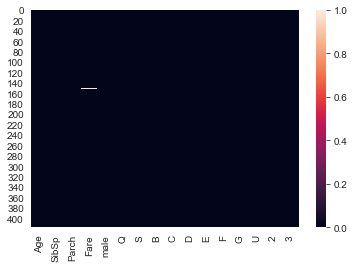

In [246]:
sbs.heatmap(train_data.isnull())

In [ ]:
# And replace

In [247]:
train_data['Fare'].fillna(method='backfill', inplace=True)

In [248]:
train_data.head()

Age  SibSp  Parch     Fare  male  Q  S  B  C  D  E  F  G  U  2  3
0  34.5      0      0   7.8292     1  1  0  0  0  0  0  0  0  1  0  1
1  47.0      1      0   7.0000     0  0  1  0  0  0  0  0  0  1  0  1
2  62.0      0      0   9.6875     1  1  0  0  0  0  0  0  0  1  1  0
3  27.0      0      0   8.6625     1  0  1  0  0  0  0  0  0  1  0  1
4  22.0      1      1  12.2875     0  0  1  0  0  0  0  0  0  1  0  1

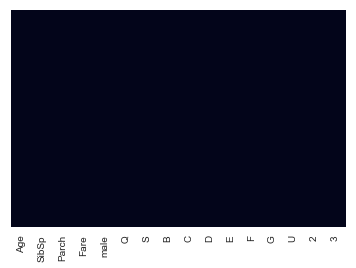

In [249]:
sbs.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [ ]:
# Exception about inconsistient number of rows, just cut them (shame, shame ...)

In [250]:
train_data.shape

(418, 16)

In [251]:
test_data.shape

(891, 18)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(train_data,test_data['Survived'].head(train_data.shape[0]), test_size=0.30, random_state=999)

In [253]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [254]:
predictions = logmodel.predict(X_test)

In [255]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76        84
           1       0.31      0.10      0.15        42

   micro avg       0.63      0.63      0.63       126
   macro avg       0.49      0.49      0.45       126
weighted avg       0.55      0.63      0.56       126



In [ ]:
# We have quite bad but our own model